In [1]:
import pandas as pd
import torch
import os
import sys
from torch.utils.data import DataLoader
import time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from dataset_PAMAP2 import dataset_PAMAP2

In [2]:
no_id_list=[108,109]
dataset=dataset_PAMAP2(no_id_list)

In [4]:
#import importlib
#importlib.reload(models)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(results,stepsize,labels_name,id_fig):
    res=results
    fichier = open("Results.txt", "a")
    
    fich2 = open(str(id_fig)+"_All_activities_Step_"+str(stepsize)+".txt", "a")
    for k in res:
        txt=""
        for l in k:
            txt+=str(l)+" "
            
        fich2.write(txt+"\n")
    fich2.close()
    
    
    fig=plt.figure(figsize=(6, 10))
    ax=plt.subplot(polar=True)
    
    ax.set_ylim(0.4,1)
    ax.set_yticks(np.arange(0.5,1,0.1))
    
    id_tests=[101,102,103,104,105,106,107]
    angles=[i*360/len(id_tests) for i in range(len(id_tests))]
    lines, labels = plt.thetagrids(angles, (id_tests))
    j=0
    for i in res:
        fichier.write(str(id_fig)+"_All_activities_Step_"+str(stepsize)+" "+labels_name[j] +":  "+str(sum(i)/len(i))+"\n")
        print("\n\nPrediction: ",sum(i)/len(i)," \n\n")
        j+=1
        i.append(i[0]) 
        theta = np.linspace(0, 2 * np.pi, len(i))
        plt.plot(theta, i)
    
    fichier.close()
    
    #plt.fill(theta, actual, 'b', alpha=0.1)
    plt.legend(labels=labels_name,bbox_to_anchor=(0.5, -0.25),loc=8)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig(str(id_fig)+"_All_activities_Step_"+str(stepsize)+".png")
    plt.close(fig) 

In [6]:
#activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
#id_test=103
#batch_size=64
#stepsize=32
#window_size=256
#train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,batch_size)

# Apprentissage

In [7]:
import models
import importlib
importlib.reload(models)
import pytorch_lightning as pl 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [8]:
def train_model(model, clipping, num_epochs, data_loader_train, data_loader_val, data_loader_test):

    early_stop_callback = EarlyStopping(
      monitor='valid_accuracy',
      min_delta=0.00,
      patience=15,
      verbose=False,
      mode='max'
    )
    trainer = Trainer(max_epochs=num_epochs, gradient_clip_val= clipping, progress_bar_refresh_rate = 40, gpus=1, callbacks=[early_stop_callback])
    trainer.fit(model, data_loader_train, data_loader_val)
    final_results = trainer.logged_metrics
    final_results["test"] = trainer.test(model, data_loader_test)[0]
    final_results["num_epochs"] = trainer.current_epoch
    final_results["num_parameters"] = model.num_paramaters
    return final_results

# Comparaison des modèles

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6970094442367554,
 'test_accuracy_epoch': 0.6970094442367554,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.006885188166052103,
 'test_loss': 11.453856468200684,
 'test_loss_epoch': 9.568230628967285}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  101  Test Accuracy :  0.6970094442367554
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7309811115264893,
 'test_accuracy_epoch': 0.7309811115264893,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.008739731274545193,
 'test_loss': 5.323096752166748,
 'test_loss_epoch': 4.26400089263916}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  101  Test Accuracy :  0.7309811115264893
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7589191794395447,
 'test_accuracy_epoch': 0.7589191794395447,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.00788185279816389,
 'test_loss': 8.392518997192383,
 'test_loss_epoch': 7.28923225402832}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  101  Test Accuracy :  0.7589191794395447
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7454092502593994,
 'test_accuracy_epoch': 0.7454092502593994,
 'test_batch_time': 0.015622377395629883,
 'test_batch_time_epoch': 0.008063512854278088,
 'test_loss': 7.98066520690918,
 'test_loss_epoch': 6.6217474937438965}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  101  Test Accuracy :  0.7454092502593994


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7289905548095703,
 'test_accuracy_epoch': 0.7289905548095703,
 'test_batch_time': 0.0156252384185791,
 'test_batch_time_epoch': 0.006562830414623022,
 'test_loss': 2.9512569904327393,
 'test_loss_epoch': 3.645519971847534}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  102  Test Accuracy :  0.7289905548095703
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8074341416358948,
 'test_accuracy_epoch': 0.8074341416358948,
 'test_batch_time': 0.015654563903808594,
 'test_batch_time_epoch': 0.008169228211045265,
 'test_loss': 2.1655426025390625,
 'test_loss_epoch': 2.6827003955841064}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  102  Test Accuracy :  0.8074341416358948
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.717553436756134,
 'test_accuracy_epoch': 0.717553436756134,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.005990125704556704,
 'test_loss': 1.587600588798523,
 'test_loss_epoch': 2.31758713722229}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  102  Test Accuracy :  0.717553436756134
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7001491785049438,
 'test_accuracy_epoch': 0.7001491785049438,
 'test_batch_time': 0.016636133193969727,
 'test_batch_time_epoch': 0.009377297945320606,
 'test_loss': 3.703575372695923,
 'test_loss_epoch': 5.102393627166748}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  102  Test Accuracy :  0.7001491785049438


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9297520518302917,
 'test_accuracy_epoch': 0.9297520518302917,
 'test_batch_time': 0.005975246429443359,
 'test_batch_time_epoch': 0.0061283959075808525,
 'test_loss': 0.28940802812576294,
 'test_loss_epoch': 0.40243077278137207}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  103  Test Accuracy :  0.9297520518302917
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9233658909797668,
 'test_accuracy_epoch': 0.9233658909797668,
 'test_batch_time': 0.007979393005371094,
 'test_batch_time_epoch': 0.008878756314516068,
 'test_loss': 0.5716856122016907,
 'test_loss_epoch': 0.5461573600769043}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  103  Test Accuracy :  0.9233658909797668
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9224267601966858,
 'test_accuracy_epoch': 0.9224267601966858,
 'test_batch_time': 0.006978273391723633,
 'test_batch_time_epoch': 0.008226284757256508,
 'test_loss': 0.5159177780151367,
 'test_loss_epoch': 0.558570384979248}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  103  Test Accuracy :  0.9224267601966858
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7599549293518066,
 'test_accuracy_epoch': 0.7599549293518066,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009497524239122868,
 'test_loss': 2.6567866802215576,
 'test_loss_epoch': 2.7847185134887695}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  103  Test Accuracy :  0.7599549293518066


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8923424482345581,
 'test_accuracy_epoch': 0.8923424482345581,
 'test_batch_time': 0.015616893768310547,
 'test_batch_time_epoch': 0.005210399627685547,
 'test_loss': 0.23463571071624756,
 'test_loss_epoch': 0.4895552396774292}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  104  Test Accuracy :  0.8923424482345581
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8736931085586548,
 'test_accuracy_epoch': 0.8736931085586548,
 'test_batch_time': 0.015630245208740234,
 'test_batch_time_epoch': 0.008209817111492157,
 'test_loss': 0.6928617358207703,
 'test_loss_epoch': 0.8766127228736877}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  104  Test Accuracy :  0.8736931085586548
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8561740517616272,
 'test_accuracy_epoch': 0.8561740517616272,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007465492933988571,
 'test_loss': 2.0685513019561768,
 'test_loss_epoch': 2.29944109916687}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  104  Test Accuracy :  0.8561740517616272
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8840067982673645,
 'test_accuracy_epoch': 0.8840067982673645,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007876889780163765,
 'test_loss': 0.9338456988334656,
 'test_loss_epoch': 1.0636874437332153}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  104  Test Accuracy :  0.8840067982673645


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6349663734436035,
 'test_accuracy_epoch': 0.6349663734436035,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004670501220971346,
 'test_loss': 2.900588274002075,
 'test_loss_epoch': 2.634385824203491}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  105  Test Accuracy :  0.6349663734436035
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5220941305160522,
 'test_accuracy_epoch': 0.5220941305160522,
 'test_batch_time': 0.015619516372680664,
 'test_batch_time_epoch': 0.007136560045182705,
 'test_loss': 3.7579784393310547,
 'test_loss_epoch': 3.9692654609680176}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  105  Test Accuracy :  0.5220941305160522
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6231988668441772,
 'test_accuracy_epoch': 0.6231988668441772,
 'test_batch_time': 0.01562643051147461,
 'test_batch_time_epoch': 0.008666378445923328,
 'test_loss': 3.4557313919067383,
 'test_loss_epoch': 3.8911681175231934}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  105  Test Accuracy :  0.6231988668441772
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5391450524330139,
 'test_accuracy_epoch': 0.5391450524330139,
 'test_batch_time': 0.015627384185791016,
 'test_batch_time_epoch': 0.009771746583282948,
 'test_loss': 4.547374725341797,
 'test_loss_epoch': 4.448236465454102}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  105  Test Accuracy :  0.5391450524330139


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9011521339416504,
 'test_accuracy_epoch': 0.9011521339416504,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004369047936052084,
 'test_loss': 0.4802809953689575,
 'test_loss_epoch': 0.6116445660591125}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  106  Test Accuracy :  0.9011521339416504
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8143492937088013,
 'test_accuracy_epoch': 0.8143492937088013,
 'test_batch_time': 0.015649795532226562,
 'test_batch_time_epoch': 0.00821660365909338,
 'test_loss': 0.9186996817588806,
 'test_loss_epoch': 1.1632030010223389}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  106  Test Accuracy :  0.8143492937088013
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8661953210830688,
 'test_accuracy_epoch': 0.8661953210830688,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.006286149844527245,
 'test_loss': 0.6441254615783691,
 'test_loss_epoch': 0.7635185122489929}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  106  Test Accuracy :  0.8661953210830688
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9283844232559204,
 'test_accuracy_epoch': 0.9283844232559204,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0071005988866090775,
 'test_loss': 0.23842768371105194,
 'test_loss_epoch': 0.4132954180240631}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  106  Test Accuracy :  0.9283844232559204


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 92.2 K
------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.434     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.899197518825531,
 'test_accuracy_epoch': 0.899197518825531,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004506891593337059,
 'test_loss': 0.6690715551376343,
 'test_loss_epoch': 0.5743426084518433}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  107  Test Accuracy :  0.899197518825531
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8808953762054443,
 'test_accuracy_epoch': 0.8808953762054443,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007886579260230064,
 'test_loss': 1.1349643468856812,
 'test_loss_epoch': 1.0781821012496948}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  107  Test Accuracy :  0.8808953762054443
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | conv             | Sequential         | 16.2 K
4 | attention_layers | MultiheadAttention | 66.0 K
5 | classifier       | Sequential         | 92.2 K
--------------------------------------------------------
174 K     Trainable params
0         Non-trainable params
174 K     Total params
0.698     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9091932773590088,
 'test_accuracy_epoch': 0.9091932773590088,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.00881007220596075,
 'test_loss': 1.01015043258667,
 'test_loss_epoch': 0.6968900561332703}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  107  Test Accuracy :  0.9091932773590088
128


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9457975625991821,
 'test_accuracy_epoch': 0.9457975625991821,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007942519150674343,
 'test_loss': 0.6756544709205627,
 'test_loss_epoch': 0.5051394104957581}
--------------------------------------------------------------------------------
Base stepsize :  32  id_test :  107  Test Accuracy :  0.9457975625991821
[[0.6970094442367554, 0.7289905548095703, 0.9297520518302917, 0.8923424482345581, 0.6349663734436035, 0.9011521339416504, 0.899197518825531], [0.7309811115264893, 0.8074341416358948, 0.9233658909797668, 0.8736931085586548, 0.5220941305160522, 0.8143492937088013, 0.8808953762054443], [0.7589191794395447, 0.717553436756134, 0.9224267601966858, 0.8561740517616272, 0.6231988668441772, 0.8661953210830688, 0.9091932773590088], [0.7454092502593994, 0.7001491785049438, 0.7599549293518066, 0.8840067982673645, 0.53

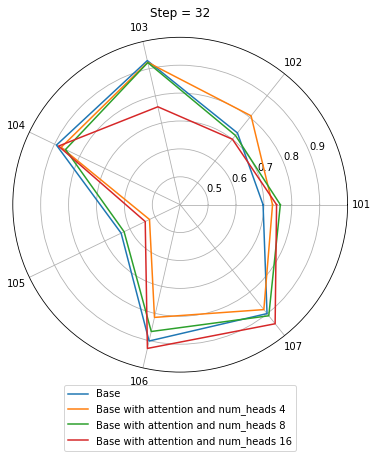

In [11]:
import importlib
importlib.reload(models)

activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
#batch_size=32
batch_sizes={8:256,16:128,32:64,64:32,128:16,256:8}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[32] #128,64,32,16,8]
window_size=512
results=[[],[],[],[]]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,4*batch_sizes[stepsize])
        
        
        channels = [40, 120, 240]
        #modèle de Base
        model3 = models.MultiChannelBase(channels, [5,5], 512, len(activity_list),attention = True, mode = "mean", num_heads = 4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model3, 1, 50, train_data,test_data,test_data)
        print("Base stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model3
        torch.cuda.empty_cache()
        
        #modèle de Base
        model4 = models.MultiChannelBase(channels, [5,5], 512, len(activity_list),attention = True,mode = "one", num_heads = 4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model4, 1, 50, train_data,test_data,test_data)
        print("Base stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[3].append(res['test']['test_accuracy'])
        del model4
        torch.cuda.empty_cache()
      
    print(results)
    plot_accuracies(results,stepsize,["Base with attention and num_heads 4 flatten","Base with attention and num_heads 4 mean","Base with attention and num_heads 4 one"],"512_Flatten_Attention_Base_")
    results=[[],[],[],[]]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6507083177566528,
 'test_accuracy_epoch': 0.6507083177566528,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004797536414116621,
 'test_loss': 5.534334659576416,
 'test_loss_epoch': 4.837132453918457}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  101  Test Accuracy :  0.6507083177566528


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.691369354724884,
 'test_accuracy_epoch': 0.691369354724884,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.00901253242045641,
 'test_loss': 2.5208160877227783,
 'test_loss_epoch': 2.1112358570098877}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  101  Test Accuracy :  0.691369354724884


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6904512047767639,
 'test_accuracy_epoch': 0.6904512047767639,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009116173721849918,
 'test_loss': 2.0331664085388184,
 'test_loss_epoch': 1.8571079969406128}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  101  Test Accuracy :  0.6904512047767639


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7001574039459229,
 'test_accuracy_epoch': 0.7001574039459229,
 'test_batch_time': 0.015621423721313477,
 'test_batch_time_epoch': 0.013911454007029533,
 'test_loss': 2.1274218559265137,
 'test_loss_epoch': 1.905516266822815}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  101  Test Accuracy :  0.7001574039459229


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9414470195770264,
 'test_accuracy_epoch': 0.9414470195770264,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007329401094466448,
 'test_loss': 0.21549148857593536,
 'test_loss_epoch': 0.35720518231391907}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  102  Test Accuracy :  0.9414470195770264


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9328691959381104,
 'test_accuracy_epoch': 0.9328691959381104,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009669390507042408,
 'test_loss': 0.22188149392604828,
 'test_loss_epoch': 0.3221018314361572}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  102  Test Accuracy :  0.9328691959381104


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9121084213256836,
 'test_accuracy_epoch': 0.9121084213256836,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.011736094951629639,
 'test_loss': 0.43691423535346985,
 'test_loss_epoch': 0.6336655020713806}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  102  Test Accuracy :  0.9121084213256836


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9196916818618774,
 'test_accuracy_epoch': 0.9196916818618774,
 'test_batch_time': 0.015620708465576172,
 'test_batch_time_epoch': 0.01606586202979088,
 'test_loss': 0.2382529377937317,
 'test_loss_epoch': 0.5573805570602417}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  102  Test Accuracy :  0.9196916818618774


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8670172691345215,
 'test_accuracy_epoch': 0.8670172691345215,
 'test_batch_time': 0.015625,
 'test_batch_time_epoch': 0.007116408087313175,
 'test_loss': 0.8896372318267822,
 'test_loss_epoch': 0.7837046980857849}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  103  Test Accuracy :  0.8670172691345215


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9107813835144043,
 'test_accuracy_epoch': 0.9107813835144043,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.011077559553086758,
 'test_loss': 0.6519410610198975,
 'test_loss_epoch': 0.42212578654289246}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  103  Test Accuracy :  0.9107813835144043


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9077761173248291,
 'test_accuracy_epoch': 0.9077761173248291,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.01274818554520607,
 'test_loss': 0.4510708153247833,
 'test_loss_epoch': 0.45287466049194336}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  103  Test Accuracy :  0.9077761173248291


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8818557262420654,
 'test_accuracy_epoch': 0.8818557262420654,
 'test_batch_time': 0.015652894973754883,
 'test_batch_time_epoch': 0.01579740084707737,
 'test_loss': 0.4188976287841797,
 'test_loss_epoch': 0.5208591818809509}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  103  Test Accuracy :  0.8818557262420654


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.941932737827301,
 'test_accuracy_epoch': 0.941932737827301,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007559675723314285,
 'test_loss': 0.35575219988822937,
 'test_loss_epoch': 0.34883546829223633}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  104  Test Accuracy :  0.941932737827301


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9474427700042725,
 'test_accuracy_epoch': 0.9474427700042725,
 'test_batch_time': 0.015623331069946289,
 'test_batch_time_epoch': 0.011413664557039738,
 'test_loss': 0.47120049595832825,
 'test_loss_epoch': 0.35435864329338074}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  104  Test Accuracy :  0.9474427700042725


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9190449118614197,
 'test_accuracy_epoch': 0.9190449118614197,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.013306974433362484,
 'test_loss': 0.23901590704917908,
 'test_loss_epoch': 0.34836822748184204}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  104  Test Accuracy :  0.9190449118614197


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8988415002822876,
 'test_accuracy_epoch': 0.8988415002822876,
 'test_batch_time': 0.01561737060546875,
 'test_batch_time_epoch': 0.016155924648046494,
 'test_loss': 0.35877087712287903,
 'test_loss_epoch': 0.48060375452041626}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  104  Test Accuracy :  0.8988415002822876


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8886887431144714,
 'test_accuracy_epoch': 0.8886887431144714,
 'test_batch_time': 0.015614509582519531,
 'test_batch_time_epoch': 0.00774493208155036,
 'test_loss': 0.887435793876648,
 'test_loss_epoch': 0.6451842188835144}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  105  Test Accuracy :  0.8886887431144714


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.869836688041687,
 'test_accuracy_epoch': 0.869836688041687,
 'test_batch_time': 0.015625476837158203,
 'test_batch_time_epoch': 0.011097639799118042,
 'test_loss': 0.6987252235412598,
 'test_loss_epoch': 0.8554879426956177}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  105  Test Accuracy :  0.869836688041687


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8854466676712036,
 'test_accuracy_epoch': 0.8854466676712036,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.011591336689889431,
 'test_loss': 0.7579917311668396,
 'test_loss_epoch': 0.7145618200302124}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  105  Test Accuracy :  0.8854466676712036


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9073006510734558,
 'test_accuracy_epoch': 0.9073006510734558,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.014552230946719646,
 'test_loss': 0.2681514024734497,
 'test_loss_epoch': 0.5078878998756409}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  105  Test Accuracy :  0.9073006510734558


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9135899543762207,
 'test_accuracy_epoch': 0.9135899543762207,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.006681791506707668,
 'test_loss': 0.2403048425912857,
 'test_loss_epoch': 0.30873358249664307}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  106  Test Accuracy :  0.9135899543762207


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9205289483070374,
 'test_accuracy_epoch': 0.9205289483070374,
 'test_batch_time': 0.015622138977050781,
 'test_batch_time_epoch': 0.01300351694226265,
 'test_loss': 0.3802589774131775,
 'test_loss_epoch': 0.3064018487930298}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  106  Test Accuracy :  0.9205289483070374


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9295626878738403,
 'test_accuracy_epoch': 0.9295626878738403,
 'test_batch_time': 0.013974666595458984,
 'test_batch_time_epoch': 0.015993213281035423,
 'test_loss': 0.25729942321777344,
 'test_loss_epoch': 0.32520899176597595}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  106  Test Accuracy :  0.9295626878738403


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8960461020469666,
 'test_accuracy_epoch': 0.8960461020469666,
 'test_batch_time': 0.015620708465576172,
 'test_batch_time_epoch': 0.01657690294086933,
 'test_loss': 0.34919941425323486,
 'test_loss_epoch': 0.3975737690925598}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  106  Test Accuracy :  0.8960461020469666


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9633957743644714,
 'test_accuracy_epoch': 0.9633957743644714,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.007377589121460915,
 'test_loss': 0.06569858640432358,
 'test_loss_epoch': 0.21825678646564484}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  107  Test Accuracy :  0.9633957743644714


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9614247679710388,
 'test_accuracy_epoch': 0.9614247679710388,
 'test_batch_time': 0.015625476837158203,
 'test_batch_time_epoch': 0.01072370819747448,
 'test_loss': 0.031602174043655396,
 'test_loss_epoch': 0.18968063592910767}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  107  Test Accuracy :  0.9614247679710388


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.6 K
4 | classifier       | Sequential         | 138 K 
--------------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.620     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9550893902778625,
 'test_accuracy_epoch': 0.9550893902778625,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.013231249526143074,
 'test_loss': 0.06412903219461441,
 'test_loss_epoch': 0.15845218300819397}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  107  Test Accuracy :  0.9550893902778625


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.960580050945282,
 'test_accuracy_epoch': 0.960580050945282,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.015597597695887089,
 'test_loss': 0.163103848695755,
 'test_loss_epoch': 0.24658629298210144}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  32  id_test :  107  Test Accuracy :  0.960580050945282
[[0.6507083177566528, 0.9414470195770264, 0.8670172691345215, 0.941932737827301, 0.8886887431144714, 0.9135899543762207, 0.9633957743644714], [0.691369354724884, 0.9328691959381104, 0.9107813835144043, 0.9474427700042725, 0.869836688041687, 0.9205289483070374, 0.9614247679710388], [0.6904512047767639, 0.9121084213256836, 0.9077761173248291, 0.9190449118614197, 0.8854466676712036, 0.9295626878738403, 0.9550893902778625], [0.7001574039459229, 0.9196916818618774, 0.8818557262420654, 0.89884150

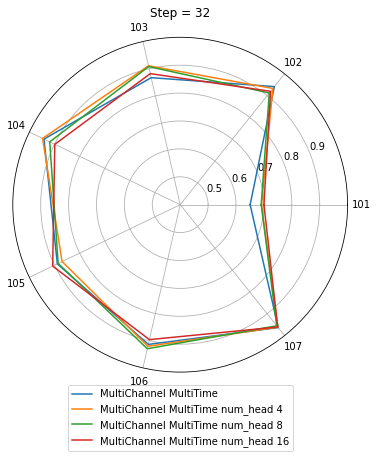

In [9]:
import importlib
importlib.reload(models)

activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
#batch_size=32
batch_sizes={8:256,16:128,32:64,64:32,128:16,256:8}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[32] #128,64,32,16,8]
window_size=512
results=[[],[],[],[]]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,4*batch_sizes[stepsize])
        
        
        
        #modèle MultiChannel MultiTime
        window_sizes=[512,256,128]
        kernel_sizes=[[5,5,5],[5,5],[5]]
        channels = [[40, 120, 240, 240], [40, 120, 240], [40,120]]
        model2 = models.MultiChannelMultiTime(channels,window_sizes, kernel_sizes, len(activity_list),attention=True, mode = "mean", num_heads=4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model2, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model2
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime
        window_sizes=[512,256,128]
        kernel_sizes=[[5,5,5],[5,5],[5]]
        model2 = models.MultiChannelMultiTime(channels,window_sizes, kernel_sizes, len(activity_list),attention=True, mode = "one", num_heads=4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model2, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[3].append(res['test']['test_accuracy'])
        del model2
        torch.cuda.empty_cache()
        
    
    print(results)
    plot_accuracies(results,stepsize,[
                                      "MultiChannel MultiTime num_head 4 flat",
                                      "MultiChannel MultiTime num_head 4 mean",
                                      "MultiChannel MultiTime num_head 4 choose one"],"512_Flatten_Attention_MCMT_different_modes")
    results=[[],[],[],[]]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6825813055038452,
 'test_accuracy_epoch': 0.6825813055038452,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0064605362713336945,
 'test_loss': 1.9719053506851196,
 'test_loss_epoch': 1.6046520471572876}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  101  Test Accuracy :  0.6825813055038452
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.65647953748703,
 'test_accuracy_epoch': 0.65647953748703,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.008669145405292511,
 'test_loss': 3.3013522624969482,
 'test_loss_epoch': 3.2634479999542236}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  101  Test Accuracy :  0.65647953748703
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6378541588783264,
 'test_accuracy_epoch': 0.6378541588783264,
 'test_batch_time': 0.015648365020751953,
 'test_batch_time_epoch': 0.012469973415136337,
 'test_loss': 2.4947023391723633,
 'test_loss_epoch': 2.1919474601745605}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  101  Test Accuracy :  0.6378541588783264


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9247886538505554,
 'test_accuracy_epoch': 0.9247886538505554,
 'test_batch_time': 0.005984306335449219,
 'test_batch_time_epoch': 0.007182633504271507,
 'test_loss': 0.28152996301651,
 'test_loss_epoch': 0.3185787796974182}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  102  Test Accuracy :  0.9247886538505554
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.933739423751831,
 'test_accuracy_epoch': 0.933739423751831,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009432139806449413,
 'test_loss': 0.25821301341056824,
 'test_loss_epoch': 0.2559846341609955}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  102  Test Accuracy :  0.933739423751831
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9183242321014404,
 'test_accuracy_epoch': 0.9183242321014404,
 'test_batch_time': 0.015621423721313477,
 'test_batch_time_epoch': 0.012955074198544025,
 'test_loss': 0.372476726770401,
 'test_loss_epoch': 0.35272127389907837}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  102  Test Accuracy :  0.9183242321014404


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9000751376152039,
 'test_accuracy_epoch': 0.9000751376152039,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.005510153714567423,
 'test_loss': 0.4752708375453949,
 'test_loss_epoch': 0.38058316707611084}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  103  Test Accuracy :  0.9000751376152039
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8807287812232971,
 'test_accuracy_epoch': 0.8807287812232971,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.00893391203135252,
 'test_loss': 0.6371944546699524,
 'test_loss_epoch': 0.5370055437088013}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  103  Test Accuracy :  0.8807287812232971
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8769721984863281,
 'test_accuracy_epoch': 0.8769721984863281,
 'test_batch_time': 0.015619039535522461,
 'test_batch_time_epoch': 0.010459046810865402,
 'test_loss': 0.526887059211731,
 'test_loss_epoch': 0.4630337059497833}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  103  Test Accuracy :  0.8769721984863281


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.954365611076355,
 'test_accuracy_epoch': 0.954365611076355,
 'test_batch_time': 0.015622377395629883,
 'test_batch_time_epoch': 0.007483169436454773,
 'test_loss': 0.14885689318180084,
 'test_loss_epoch': 0.16168001294136047}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  104  Test Accuracy :  0.954365611076355
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9474427700042725,
 'test_accuracy_epoch': 0.9474427700042725,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009357807226479053,
 'test_loss': 0.22837862372398376,
 'test_loss_epoch': 0.24756497144699097}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  104  Test Accuracy :  0.9474427700042725
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9608646631240845,
 'test_accuracy_epoch': 0.9608646631240845,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.009879347868263721,
 'test_loss': 0.12440630048513412,
 'test_loss_epoch': 0.17842043936252594}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  104  Test Accuracy :  0.9608646631240845


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8435398936271667,
 'test_accuracy_epoch': 0.8435398936271667,
 'test_batch_time': 0.016735553741455078,
 'test_batch_time_epoch': 0.005799252539873123,
 'test_loss': 0.47183728218078613,
 'test_loss_epoch': 0.5050127506256104}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  105  Test Accuracy :  0.8435398936271667
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8735590577125549,
 'test_accuracy_epoch': 0.8735590577125549,
 'test_batch_time': 0.015622377395629883,
 'test_batch_time_epoch': 0.010223711840808392,
 'test_loss': 0.5544004440307617,
 'test_loss_epoch': 0.7275731563568115}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  105  Test Accuracy :  0.8735590577125549
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8394572734832764,
 'test_accuracy_epoch': 0.8394572734832764,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.011328551918268204,
 'test_loss': 0.7259460091590881,
 'test_loss_epoch': 0.837454080581665}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  105  Test Accuracy :  0.8394572734832764


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8921183347702026,
 'test_accuracy_epoch': 0.8921183347702026,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0043281982652843,
 'test_loss': 0.3937872052192688,
 'test_loss_epoch': 0.36168694496154785}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  106  Test Accuracy :  0.8921183347702026
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8946059346199036,
 'test_accuracy_epoch': 0.8946059346199036,
 'test_batch_time': 0.015621185302734375,
 'test_batch_time_epoch': 0.00849466398358345,
 'test_loss': 0.40757617354393005,
 'test_loss_epoch': 0.30680108070373535}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  106  Test Accuracy :  0.8946059346199036
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8913328051567078,
 'test_accuracy_epoch': 0.8913328051567078,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0125886807218194,
 'test_loss': 0.36650532484054565,
 'test_loss_epoch': 0.2902122437953949}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  106  Test Accuracy :  0.8913328051567078


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 138 K 
------------------------------------------
138 K     Trainable params
0         Non-trainable params
138 K     Total params
0.553     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.967056155204773,
 'test_accuracy_epoch': 0.967056155204773,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.006480235606431961,
 'test_loss': 0.23925969004631042,
 'test_loss_epoch': 0.15447881817817688}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  107  Test Accuracy :  0.967056155204773
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type               | Params
--------------------------------------------------------
0 | train_acc        | Accuracy           | 0     
1 | valid_acc        | Accuracy           | 0     
2 | test_acc         | Accuracy           | 0     
3 | attention_layers | MultiheadAttention | 16.1 K
4 | classifier       | Sequential         | 136 K 
--------------------------------------------------------
152 K     Trainable params
0         Non-trainable params
152 K     Total params
0.609     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9688863754272461,
 'test_accuracy_epoch': 0.9688863754272461,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.010292797349393368,
 'test_loss': 0.21728193759918213,
 'test_loss_epoch': 0.14739246666431427}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  107  Test Accuracy :  0.9688863754272461
63


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9757848978042603,
 'test_accuracy_epoch': 0.9757848978042603,
 'test_batch_time': 0.015622377395629883,
 'test_batch_time_epoch': 0.01067492924630642,
 'test_loss': 0.2050522267818451,
 'test_loss_epoch': 0.1183672845363617}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  32  id_test :  107  Test Accuracy :  0.9757848978042603
[[0.6825813055038452, 0.9247886538505554, 0.9000751376152039, 0.954365611076355, 0.8435398936271667, 0.8921183347702026, 0.967056155204773], [0.65647953748703, 0.933739423751831, 0.8807287812232971, 0.9474427700042725, 0.8735590577125549, 0.8946059346199036, 0.9688863754272461], [0.6378541588783264, 0.9183242321014404, 0.8769721984863281, 0.9608646631240845, 0.8394572734832764, 0.8913328051567078, 0.9757848978042603]]


Prediction:  0.8806464416640145  




Pre

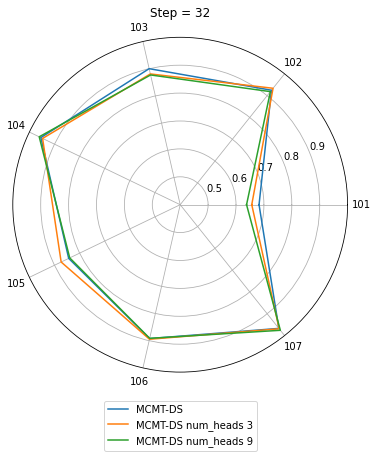

In [10]:
import importlib
importlib.reload(models)
activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
batch_sizes={8:256,16:128,32:64,64:32,128:16,256:8}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[32] #128,64,32,16,8]
window_size=512
results=[[],[],[]]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,window_size,stepsize,4*batch_sizes[stepsize])
        
        
        
        #modèle MultiChannel MultiTime DownSample
        window_sizes=[512,256,125]
        kernel_sizes=[5]
        down_sampling_kernel=[[5,5],[5],[]]
        model1 = models.MultiChannelMultiTimeDownSample(channels,window_sizes,
                                                        down_sampling_kernel, 
                                                        kernel_sizes,125, 
                                                        len(activity_list),
                                                        attention=True,
                                                        mode = "mean",
                                                        num_heads=3,
                                                        lr = 0.0001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model1, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime DownSample stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model1
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime DownSample
        window_sizes=[512,256,125]
        kernel_sizes=[5]
        down_sampling_kernel=[[5,5],[5],[]]
        model1 = models.MultiChannelMultiTimeDownSample(channels,window_sizes,
                                                        down_sampling_kernel, 
                                                        kernel_sizes,125, 
                                                        len(activity_list),
                                                        attention=True,
                                                        mode = "one",
                                                        num_heads=3,
                                                        lr = 0.0001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model1, 1, 50, train_data,test_data,test_data)
        print("MultiChannel MultiTime DownSample stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model1
        torch.cuda.empty_cache()
        
      
    print(results)
    plot_accuracies(results,stepsize,["MCMT-DS num_heads 3 flat",
                                      "MCMT-DS num_heads 3 mean",
                                      "MCMT-DS num_heads 3 one"],"512_Flatten_ Attention_MCMTDS_different_modes")
    results=[[],[],[]]